In [ ]:
%matplotlib inline
!pip install contextily
!pip install geopandas
import pandas as pd
import geopandas
import contextily as ctx
from shapely.geometry import Point
import xyzservices.providers as xyz

from google.colab import drive
drive.mount('/content/drive')

     |████████████████████████████████| 19.3 MB 25.6 MB/s 
     |████████████████████████████████| 1.0 MB 14.0 MB/s 
     |████████████████████████████████| 15.4 MB 51 kB/s 
     |████████████████████████████████| 6.3 MB 35.5 MB/s 
Mounted at /content/drive


1. visualizzi su una mappa i 10 corsi d'acqua più lunghi della provincia di Milano

In [ ]:
CorsiDacqua = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Esercizio 7/Corsi_acqua_Piano_di_Gestione.zip')
CorsiDacqua

OBJECTID  ...                                           geometry
0        188  ...  LINESTRING (480362.262 5040575.220, 480364.627...
1        191  ...  MULTILINESTRING ((494060.091 5029696.046, 4940...
2        215  ...  MULTILINESTRING ((536963.747 5005395.412, 5369...
3        252  ...  LINESTRING (509280.513 5047845.024, 509281.795...
4        255  ...  LINESTRING (528977.056 5024109.798, 528981.181...
5        256  ...  MULTILINESTRING ((530299.337 5029522.740, 5302...
6        282  ...  LINESTRING (514894.561 5036362.164, 514898.993...
7         65  ...  MULTILINESTRING ((483579.882 5034726.498, 4835...
8         66  ...  MULTILINESTRING ((477067.969 5044605.066, 4770...
9         67  ...  MULTILINESTRING ((477477.600 5043097.081, 4774...
10        84  ...  MULTILINESTRING ((541297.507 5041518.075, 5412...
11        89  ...  LINESTRING (508090.899 5042218.610, 508089.941...
12        91  ...  MULTILINESTRING ((496168.003 5046279.338, 4961...
13        93  ...  MULTILINESTRING ((525857.172 5023446.332, 5258...
14       111  ...  MULTILINESTRING ((508837.773 5045937.205, 5088...
15       112  ...  MULTILINESTRING ((516227.432 5021570.890, 5162...
16       113  ...  LINESTRING (518545.443 5029547.737, 518544.379...
17       114  ...  MULTILINESTRING ((521208.084 5044838.623, 5212...
18       124  ...  MULTILINESTRING ((478097.612 5045956.958, 4780...
19       169  ...  MULTILINESTRING ((532925.930 5047367.573, 5329...
20       170  ...  LINESTRING (534665.365 5048814.505, 534665.277...
21       311  ...  MULTILINESTRING ((541065.056 5043895.637, 5410...
22       323  ...  MULTILINESTRING ((540405.663 5051150.915, 5404...
23       332  ...  MULTILINESTRING ((514309.053 5017285.313, 5143...
24       355  ...  MULTILINESTRING ((485612.702 5049364.485, 4856...
25       356  ...  MULTILINESTRING ((502646.142 5047823.543, 5026...
26       357  ...  MULTILINESTRING ((495438.399 5047188.843, 4954...
27       358  ...  LINESTRING (504109.620 5040607.275, 504113.432...
28       448  ...  LINESTRING (512157.688 5048463.394, 512157.976...
29       457  ...  LINESTRING (506881.191 5048869.732, 506884.401...
30       498  ...  MULTILINESTRING ((495633.621 5016541.175, 4956...
31       501  ...  LINESTRING (541227.887 5050214.931, 541227.203...
32       398  ...  LINESTRING (513927.378 5033222.100, 513927.258...
33       428  ...  MULTILINESTRING ((507915.612 5019743.337, 5079...
34       562  ...  MULTILINESTRING ((508504.554 5051917.198, 5085...
35       565  ...  LINESTRING (541818.985 5047325.989, 541818.901...
36       593  ...  MULTILINESTRING ((541297.507 5041518.075, 5412...
37       597  ...  LINESTRING (533523.584 5047140.053, 533523.459...
38       601  ...  MULTILINESTRING ((478094.145 5046036.944, 4780...
39       619  ...  LINESTRING (513185.093 5030112.328, 513188.599...
40       637  ...  MULTILINESTRING ((529703.516 5045101.098, 5297...
41       653  ...  MULTILINESTRING ((507313.752 5043557.731, 5073...
42       655  ...  MULTILINESTRING ((497412.956 5052989.684, 4974...
43       656  ...  MULTILINESTRING ((515431.664 5025817.802, 5154...
44       676  ...  LINESTRING (507915.612 5019743.337, 507917.175...

[45 rows x 31 columns]

In [ ]:
Province = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/ProvCM01012021_g')
Province

COD_RIP  ...                                           geometry
0          1  ...  POLYGON ((411015.006 5049970.983, 411266.039 5...
1          1  ...  POLYGON ((438328.612 5087208.215, 439028.888 5...
2          1  ...  POLYGON ((460929.542 5076320.298, 461165.259 5...
3          1  ...  MULTIPOLYGON (((378673.492 4958865.159, 378928...
4          1  ...  POLYGON ((425041.329 4997628.309, 424948.989 4...
..       ...  ...                                                ...
102        1  ...  POLYGON ((457749.464 5145501.795, 458662.395 5...
103        1  ...  POLYGON ((519754.706 5065242.380, 520199.702 5...
104        3  ...  POLYGON ((884760.019 4804406.440, 885511.011 4...
105        4  ...  POLYGON ((1081237.144 4611047.023, 1081399.393...
106        5  ...  MULTIPOLYGON (((448813.650 4301762.751, 448823...

[107 rows x 13 columns]

In [ ]:
ProvMilano=Province[Province['DEN_UTS']=='Milano']
ProvMilano

COD_RIP  ...                                           geometry
14        1  ...  MULTIPOLYGON (((538136.289 5004372.814, 539162...

[1 rows x 13 columns]

In [ ]:
CorsiMilano= CorsiDacqua[CorsiDacqua.intersects(ProvMilano.geometry.squeeze())]
CorsiMilano.count()

OBJECTID      45
COD_PTUA16    45
NATURA        45
REGIONE       45
NOME          45
SOTTOBACIN    45
TIPOLOGIA     38
A_PROTETTA    45
SENSIBILE     45
VULNERABIL    45
D_HABITAT     45
D_UCCELLI     45
RAMSAR        45
BALNEAZION    45
VITA_PESCI    45
USO_POTAB     45
AREE_A_PR     45
BACINO        45
RAGG_ECO      45
RAGG_CHI      45
STATO_ECO     45
CONF_ECO      43
STATO_CHI     45
CONF_CHI      43
ANNI_CHI      45
ANNI_ECO      45
OBB_CHI       45
OBB_ECO       45
ESENZIONI     45
SHAPE_LEN     45
geometry      45
dtype: int64

In [ ]:
CorsiPiuLunghi= CorsiMilano.sort_values('SHAPE_LEN',ascending=False).head(10)
CorsiPiuLunghi

OBJECTID  ...                                           geometry
18       124  ...  MULTILINESTRING ((478097.612 5045956.958, 4780...
36       593  ...  MULTILINESTRING ((541297.507 5041518.075, 5412...
10        84  ...  MULTILINESTRING ((541297.507 5041518.075, 5412...
0        188  ...  LINESTRING (480362.262 5040575.220, 480364.627...
7         65  ...  MULTILINESTRING ((483579.882 5034726.498, 4835...
31       501  ...  LINESTRING (541227.887 5050214.931, 541227.203...
26       357  ...  MULTILINESTRING ((495438.399 5047188.843, 4954...
8         66  ...  MULTILINESTRING ((477067.969 5044605.066, 4770...
15       112  ...  MULTILINESTRING ((516227.432 5021570.890, 5162...
1        191  ...  MULTILINESTRING ((494060.091 5029696.046, 4940...

[10 rows x 31 columns]

In [ ]:
!pip install contextily
import contextily as ctx #importazione di contextily che permette di usare i dati sopra una mappa 

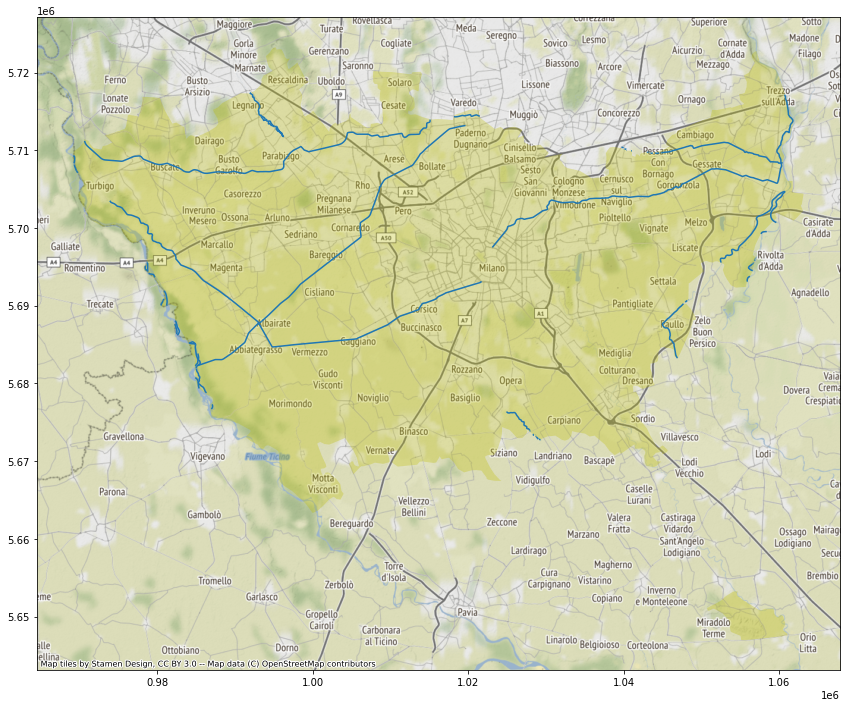

In [ ]:
ax=CorsiPiuLunghi.to_crs(epsg=3857).plot(figsize=(20,12))
ProvMilano.to_crs(epsg=3857).plot(ax=ax,alpha=0.3,facecolor='y')
ctx.add_basemap(ax)

2. visualizzi su una mappa i Navigli e i fiumi da cui prendono l'acqua. Utilizzare colori diversi per rappresentare i navigli rispetto ai fiumi ed evidenziare bene i percorsi sulla mappa

In [ ]:
Navigli=CorsiDacqua[CorsiDacqua.NOME.str.contains('Navigli')]
Navigli

OBJECTID  ...                                           geometry
0        188  ...  LINESTRING (480362.262 5040575.220, 480364.627...
31       501  ...  LINESTRING (541227.887 5050214.931, 541227.203...
32       398  ...  LINESTRING (513927.378 5033222.100, 513927.258...
44       676  ...  LINESTRING (507915.612 5019743.337, 507917.175...

[4 rows x 31 columns]

In [ ]:
fiumi=CorsiDacqua[CorsiDacqua.touches(Navigli.unary_union)]
fiumi

OBJECTID  ...                                           geometry
6        282  ...  LINESTRING (514894.561 5036362.164, 514898.993...
20       170  ...  LINESTRING (534665.365 5048814.505, 534665.277...
22       323  ...  MULTILINESTRING ((540405.663 5051150.915, 5404...
28       448  ...  LINESTRING (512157.688 5048463.394, 512157.976...
39       619  ...  LINESTRING (513185.093 5030112.328, 513188.599...

[5 rows x 31 columns]

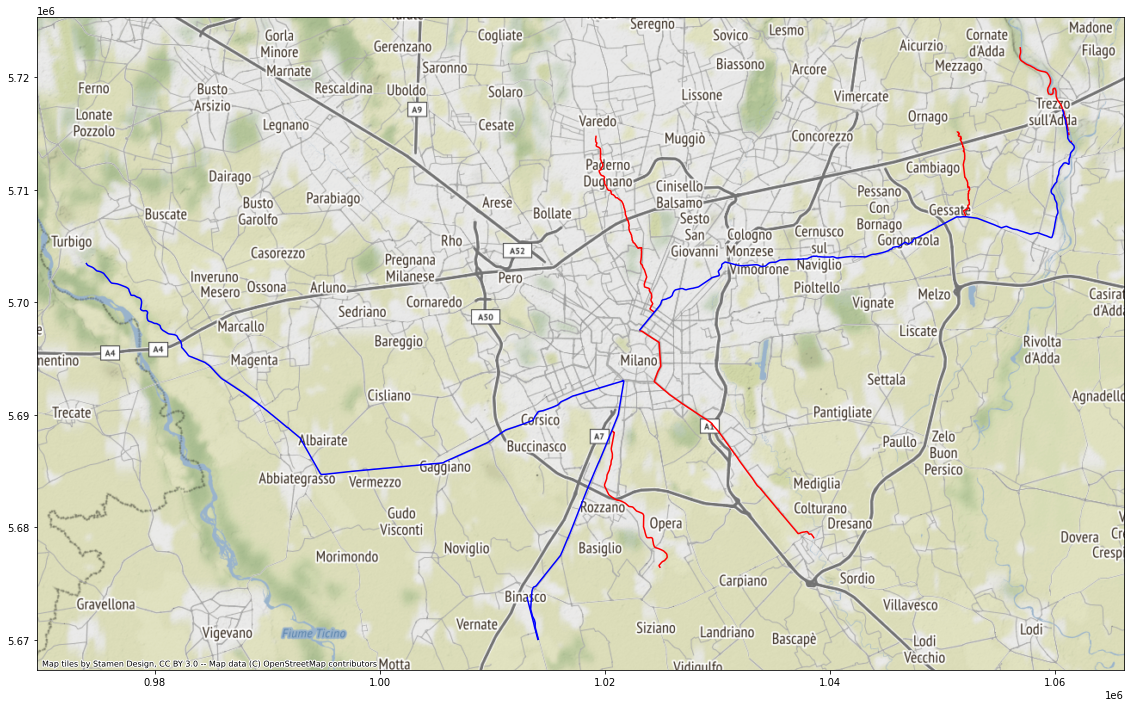

In [ ]:
ax=fiumi.to_crs(epsg=3857).plot(figsize=(20,12),edgecolor='r')
Navigli.to_crs(epsg=3857).plot(ax=ax,edgecolor='b')

ctx.add_basemap(ax)

3. visualizzi su una mappa i corsi d'acqua che passano in un comune inserito dall'utente

In [ ]:
Comuni = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Com01012021_g')
Comuni

COD_RIP  ...                                           geometry
0           1  ...  POLYGON ((404703.558 5026682.655, 405359.554 5...
1           1  ...  POLYGON ((380700.909 4977305.520, 381105.998 4...
2           1  ...  POLYGON ((364710.857 5022090.678, 364737.794 5...
3           1  ...  POLYGON ((415942.504 5033304.609, 416079.315 5...
4           1  ...  POLYGON ((376934.962 4999073.854, 376960.555 4...
...       ...  ...                                                ...
7898        5  ...  MULTIPOLYGON (((556602.772 4375162.650, 556598...
7899        5  ...  POLYGON ((541186.146 4375105.653, 541180.146 4...
7900        5  ...  MULTIPOLYGON (((546451.098 4325900.553, 546443...
7901        5  ...  POLYGON ((500362.475 4361229.767, 500397.474 4...
7902        5  ...  POLYGON ((494131.525 4353208.832, 494847.519 4...

[7903 rows x 13 columns]

Milano


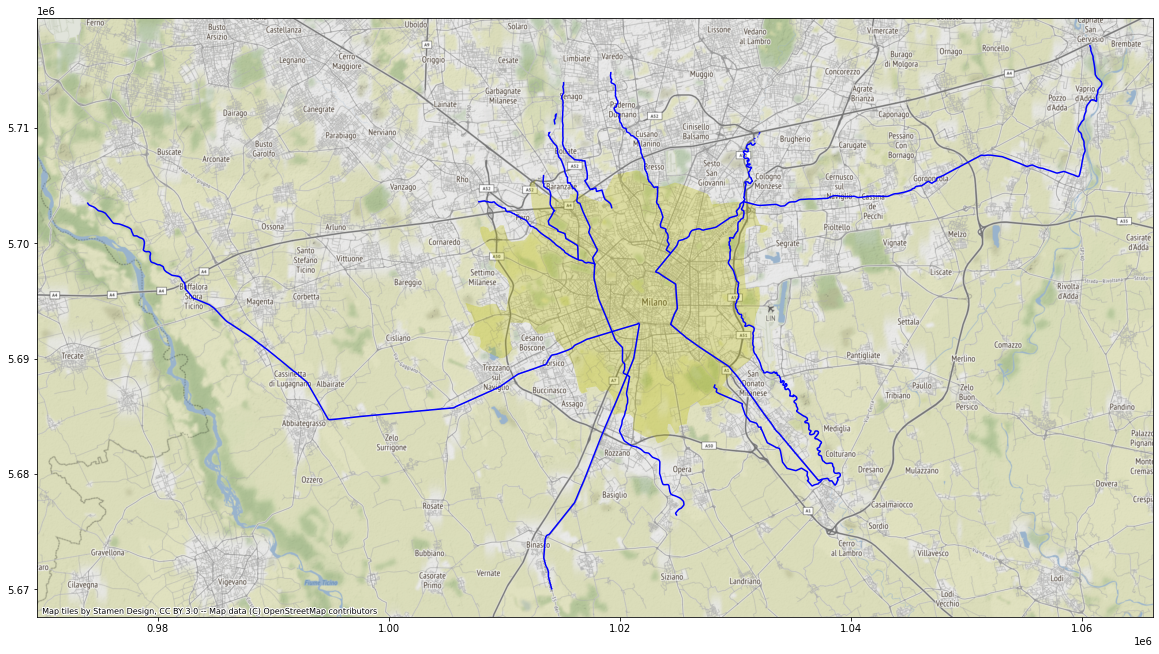

In [ ]:
user=input()
lst=list(Comuni['COMUNE'])
if user not in lst:
  print('comune inesistente')
else:
  Com=Comuni[Comuni.COMUNE==user]
  CorsiComuni=CorsiDacqua[CorsiDacqua.intersects(Com.geometry.squeeze())]
  ax=CorsiComuni.to_crs(epsg=3857).plot(figsize=(20,12), edgecolor='b')
  Com.to_crs(epsg=3857).plot(ax=ax, alpha=0.3, facecolor='y')
  ctx.add_basemap(ax)

4. visualizzi su una mappa un fiume inserito dall'utente con tutti i comuni  che attraversa. Se attraversa Milano, visualizzare solo i quartieri che attraversa

In [ ]:
quartieri = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm')
quartieri

ID_NIL  ...                                           geometry
0       48  ...  POLYGON ((9.15422 45.43775, 9.15419 45.43707, ...
1       64  ...  POLYGON ((9.10623 45.49016, 9.10295 45.48939, ...
2       67  ...  POLYGON ((9.15636 45.48785, 9.15724 45.48721, ...
3       81  ...  POLYGON ((9.16803 45.52234, 9.16687 45.52027, ...
4       84  ...  POLYGON ((9.20040 45.52848, 9.20055 45.52828, ...
..     ...  ...                                                ...
83      68  ...  POLYGON ((9.17174 45.47619, 9.17150 45.47595, ...
84       2  ...  POLYGON ((9.19165 45.46906, 9.19105 45.46843, ...
85      33  ...  POLYGON ((9.24044 45.44427, 9.24084 45.44424, ...
86      17  ...  POLYGON ((9.26729 45.51234, 9.26701 45.51241, ...
87      53  ...  POLYGON ((9.13575 45.44969, 9.13318 45.44886, ...

[88 rows x 9 columns]

La Molgora (Torrente)


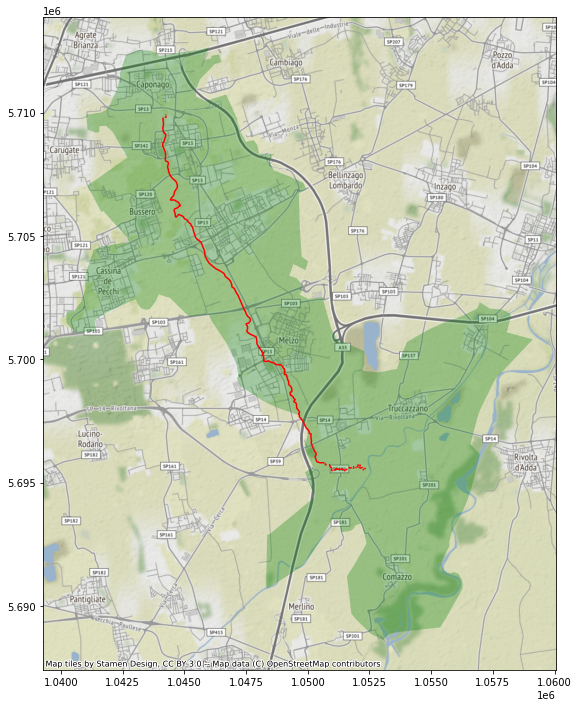

In [ ]:
user=input()
lst=list(CorsiDacqua['NOME'])
if user not in lst:
  print('Il fiume non esiste')
else:
  Fiume=CorsiDacqua[CorsiDacqua.NOME==user]
  Com=Comuni[Comuni.intersects(Fiume.geometry.squeeze())]
  ax=Fiume.to_crs(epsg=3857).plot(figsize=(20,12), edgecolor='r')
  Com.to_crs(epsg=3857).plot(ax=ax, alpha=0.3, facecolor='g')
  ctx.add_basemap(ax)
   

5. visualizzi il numero di corsi d'acqua della provincia di Milano e la lunghezza totale di tutti i corsi d'acqua

In [ ]:
Acque_Milano = CorsiDacqua[CorsiDacqua.intersects(ProvMilano.unary_union)]
print("Tot corsi d'acqua:" , Acque_Milano["NOME"].count())
print("Tot lunghezza dei corsi d'acqua:" , Acque_Milano["SHAPE_LEN"].sum() ,"km")


Tot corsi d'acqua: 45
Tot lunghezza dei corsi d'acqua: 1083787.6793008223 km


6. visualizzi su una mappa i comuni della provincia di Milano che non sono attraversati da corsi d'acqua

In [ ]:
comuni_Milano = Comuni[Comuni.within(ProvMilano.geometry.squeeze())]
comuni_Milano

COD_RIP  ...                                           geometry
1811        1  ...  POLYGON ((493446.898 5029705.643, 493602.897 5...
1812        1  ...  POLYGON ((495595.883 5032525.624, 495661.881 5...
1813        1  ...  POLYGON ((488023.938 5045041.530, 488050.939 5...
1814        1  ...  POLYGON ((506416.116 5045124.529, 506782.458 5...
1815        1  ...  POLYGON ((496562.280 5041533.478, 496401.277 5...
...       ...  ...                                                ...
1939        1  ...  POLYGON ((506102.367 5028375.154, 506991.706 5...
1940        1  ...  POLYGON ((490864.917 5047319.512, 491416.914 5...
1941        1  ...  POLYGON ((484327.133 5049844.538, 484144.917 5...
1942        1  ...  POLYGON ((509363.172 5042554.492, 509538.293 5...
1943        1  ...  POLYGON ((498700.765 5028780.650, 498917.702 5...

[133 rows x 13 columns]

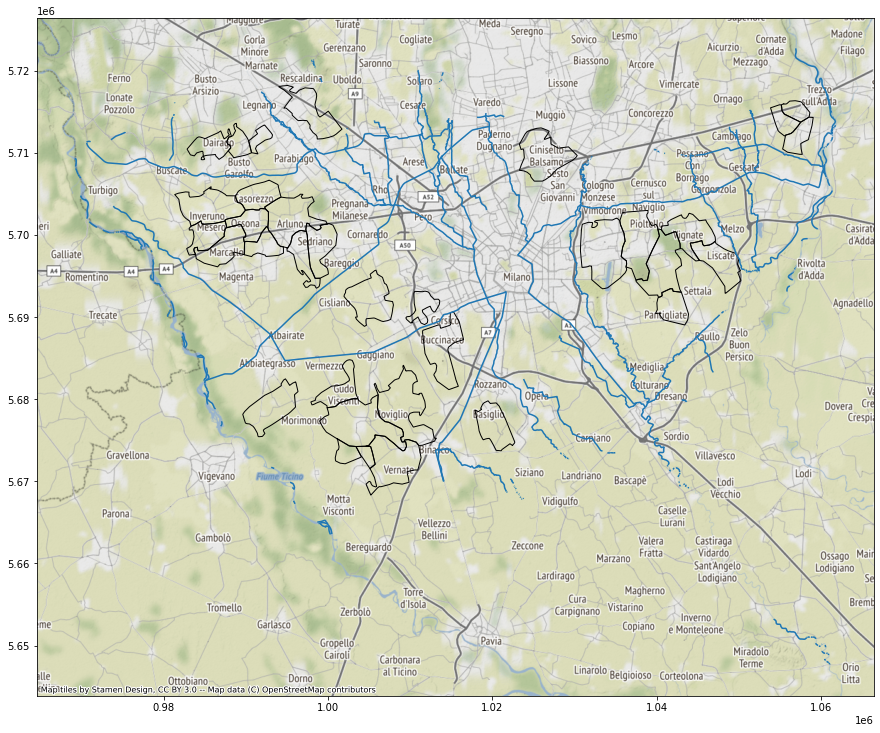

In [ ]:
#trovo i comuni attraversati dal fiume
Comuni_PROV_MILANO_Attraversati_Dal_Fiume = comuni_Milano[comuni_Milano.intersects(CorsiMilano.unary_union)]
Comuni_PROV_MILANO_Attraversati_Dal_Fiume

#trovo i comuni non attraversati dal fiume facendo una copia dei comuni di milano e sotraendo quelli attraversati
copia_comuni_Milano = comuni_Milano

#eliminare dal df dei comuni di milano quelli attraversati dal fiume facendo il df qi quelliattraversati .index
comuni_non_Attraversati = copia_comuni_Milano.drop(Comuni_PROV_MILANO_Attraversati_Dal_Fiume.index)
comuni_non_Attraversati
ax = comuni_non_Attraversati.to_crs(epsg=3857).plot(figsize = (15,15), facecolor = "none", Edgecolor = "k")
CorsiMilano.to_crs(epsg=3857).plot(ax=ax)
ctx.add_basemap(ax)